In [8]:
# connect to test.db sqlite, create session, then run "get all users" with session.Query
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from models import Base, User, Location, ExternalAddress
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

engine = create_engine(os.getenv("PLANETSCALE_URL"))

In [10]:
with sessionmaker(bind=engine)() as session:
    user = session.query(User).select_from(User).join(ExternalAddress, User.external_address == ExternalAddress.address).filter(ExternalAddress.ens == "varunsrin.eth").first()
    print(user.username)

v


In [2]:
"""
Place all models in the notebook so Copilot knows what it's working with

Here are all the available models:
parent_association = Table('parent_association', Base.metadata,
                           Column('parent_hash', String,
                                  ForeignKey('casts.hash')),
                           Column('cast_hash', String,
                                  ForeignKey('casts.hash'))
                           )


# figure out ancestor hashes later
class Cast(Base):
    __tablename__ = 'casts'
    hash = Column(String, primary_key=True)
    thread_hash = Column(String, ForeignKey(
        'casts.hash'))
    parent_hash = Column(String, ForeignKey(
        'casts.hash'), nullable=True)
    text = Column(String)
    timestamp = Column(BigInteger)
    author_fid = Column(BigInteger, ForeignKey(
        'users.fid'))
    author = relationship('User', back_populates='casts')
    reactions = relationship('Reaction', back_populates='target')
    children_hashes = relationship("Cast", secondary=parent_association,
                                   primaryjoin=(
                                       hash == parent_association.c.parent_hash),
                                   secondaryjoin=(
                                       hash == parent_association.c.cast_hash),
                                   backref="parent_casts")


class Reaction(Base):
    __tablename__ = 'reactions'
    hash = Column(String, primary_key=True)
    reaction_type = Column(String)  # like & recast
    timestamp = Column(BigInteger)
    target_hash = Column(String, ForeignKey('casts.hash'))
    author_fid = Column(BigInteger, ForeignKey('users.fid'))
    target = relationship('Cast', back_populates='reactions')


class Location(Base):
    __tablename__ = 'locations'
    place_id = Column(String, primary_key=True)
    description = Column(String)
    users = relationship('User', backref='location')


class User(Base):
    __tablename__ = 'users'
    fid = Column(BigInteger, primary_key=True)
    username = Column(String)
    display_name = Column(String)
    verified = Column(Boolean, default=False)
    pfp_url = Column(String, nullable=True)
    follower_count = Column(BigInteger)
    following_count = Column(BigInteger)
    bio_text = Column(String, nullable=True)
    location_place_id = Column(String, ForeignKey(
        'locations.place_id'), nullable=True)
    casts = relationship('Cast', back_populates='author')

"""

'\nPlace all models in the notebook so Copilot knows what it\'s working with\n\nHere are all the available models:\nparent_association = Table(\'parent_association\', Base.metadata,\n                           Column(\'parent_hash\', String,\n                                  ForeignKey(\'casts.hash\')),\n                           Column(\'cast_hash\', String,\n                                  ForeignKey(\'casts.hash\'))\n                           )\n\n\n# figure out ancestor hashes later\nclass Cast(Base):\n    __tablename__ = \'casts\'\n    hash = Column(String, primary_key=True)\n    thread_hash = Column(String, ForeignKey(\n        \'casts.hash\'))\n    parent_hash = Column(String, ForeignKey(\n        \'casts.hash\'), nullable=True)\n    text = Column(String)\n    timestamp = Column(BigInteger)\n    author_fid = Column(BigInteger, ForeignKey(\n        \'users.fid\'))\n    author = relationship(\'User\', back_populates=\'casts\')\n    reactions = relationship(\'Reaction\', back_

In [3]:
# get all users where they have location with description that contains "USA"
# description_location is from the Location model
# location_place_id is from the User model

locations = session.query(Location).filter(
    Location.description.contains("USA")).all()

# print users with locations
users = session.query(User).filter(
    User.location_place_id.in_([location.place_id for location in locations])).all()

df = pd.DataFrame([user.__dict__ for user in users])
# print(df)

# make df with username, location column

new_df = pd.DataFrame(columns=["username", "location"])
for user in users:
    new_df = pd.concat([new_df, pd.DataFrame({"username": [user.username], "location": [user.location.description]})], ignore_index=True)

print(new_df)

       username                location
0         crump   Palm Springs, CA, USA
1       saymore         Boston, MA, USA
2    willmurphy      San Mateo, CA, USA
3         megan          Miami, FL, USA
4        farcon         Boston, MA, USA
..          ...                     ...
398         sds  San Francisco, CA, USA
399       b-rad          Miami, FL, USA
400          mp  San Francisco, CA, USA
401         dwr    Los Angeles, CA, USA
402           v    Los Angeles, CA, USA

[403 rows x 2 columns]


12
lordy
gua
daish
tonysellen
praven
userman
sheftali
esskayen
thepaulbalaji
lukaslevert
slowcrypto
nt


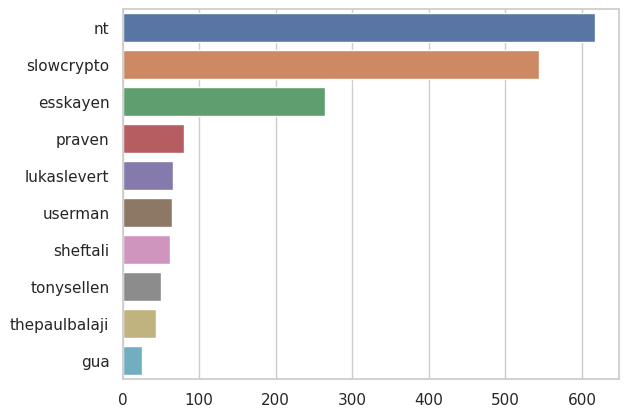

In [5]:
# get all users who are in the UK

uk_locations = session.query(Location).filter(
    Location.description.contains("UK")).all()

uk_users = session.query(User).filter(
    User.location_place_id.in_([location.place_id for location in uk_locations])).all()

# just print the usernames
print(len(uk_users))
for user in uk_users:
    print(user.username)

# from all these uk users, sort by follower

uk_users.sort(key=lambda user: user.follower_count, reverse=True)

# seaborn plot

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=[user.follower_count for user in uk_users[:10]], y=[user.username for user in uk_users[:10]])

In [9]:
# get all users with bio that contains "coinbase"

coinbase_users = session.query(User).filter(
    User.bio_text.contains("coinbase")).all()

for user in coinbase_users:
    print(user.username)

priyankavarre
edcrypto
kiefner
alfonsocj
das-mchl
newtroll
gilevy
kelvintiger
prairie
phunkren
outricked
dayvidpay
spencergolden
parthshah
mbar
arjundureja
gilly
av
technojak
priyanks
lalatina
nickp
rowan
zizzamia
poymeetsworld
rosekuan
redbeard
nnon
jcliff
azzy
lll
jennyl
stevec
elynch
wazzymandias
atif
r7n
akap
johnnychan
jeffh
ryanw
claudia
dudeguy
straightupjac
jhornthal
initcore
harry
natnat
beasley
stimpack
erd
willd
andrewa
volkan
alex102
nikitavarabei
bayardo
ilham
typeof
jorn
mbasrai
ar
plorio
jessw
rhea
styliii
cmlad
wat
jklb
vjv
surojit
intrater
moh
catmandu
antiroyalty
bit
meek
alextreece
danger
philippe
pierce
mccomb
vik
blumes
sergiy
rajivpoc
zaddycoin
gainsley
catherine
manik
verity
meghna
joewaltman
rachaelrad
zadi
mei
muneeb
kate
chintan
jungho
uneeb123
mike
chelsea
askjeev
edward
dashutch
wos
connor
stavros
karan
ras
trevoranon
0xkube
kevinj
kday
mert
gazzini
bigcymbal
blakewest
rob
godlewski
rvn
val
shivansal
vishnu
johnzettler
petekim
lacrosse
yuga
chailey
melissa
d